00:42:49 - cmdstanpy - INFO - Chain [1] start processing
00:42:49 - cmdstanpy - INFO - Chain [1] done processing


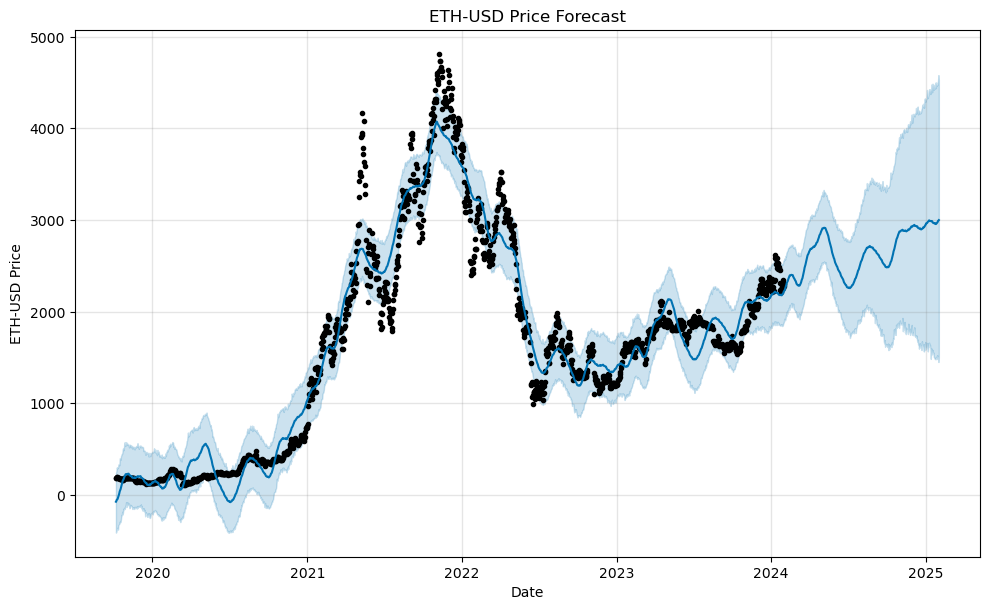

In [23]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,  # Adjust as needed
    seasonality_mode='multiplicative',  # or 'additive'
    holidays=None,  # Include holidays if relevant
)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')
plt.show()


In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Load the dataset
# file_path = "ETH-USD.csv"
# df = pd.read_csv(file_path)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Use the 'Close' prices as the target variable
# ts = df['Close']

# # Split the data into training and testing sets
# train_size = int(len(ts) * 0.8)
# train, test = ts[:train_size], ts[train_size:]

# # Fit a SARIMA model with seasonal differencing
# order = (1, 1, 1)  # Non-seasonal order (p, d, q)
# seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)
# model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
# fit_model = model.fit(disp=False)

# # Forecast future values
# forecast_steps = len(test)
# forecast = fit_model.get_forecast(steps=forecast_steps)
# forecast_values = forecast.predicted_mean
# conf_int = forecast.conf_int()

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.plot(train.index, train, label='Training Data')
# plt.plot(test.index, test, label='Test Data')
# plt.plot(test.index, forecast_values, label='SARIMA Forecast', color='red')
# plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label='Confidence Interval')
# plt.title('ETH-USD Price Forecast using SARIMA')
# plt.xlabel('Date')
# plt.ylabel('ETH-USD Price')
# plt.legend()
# plt.show()


00:43:39 - cmdstanpy - INFO - Chain [1] start processing
00:43:39 - cmdstanpy - INFO - Chain [1] done processing


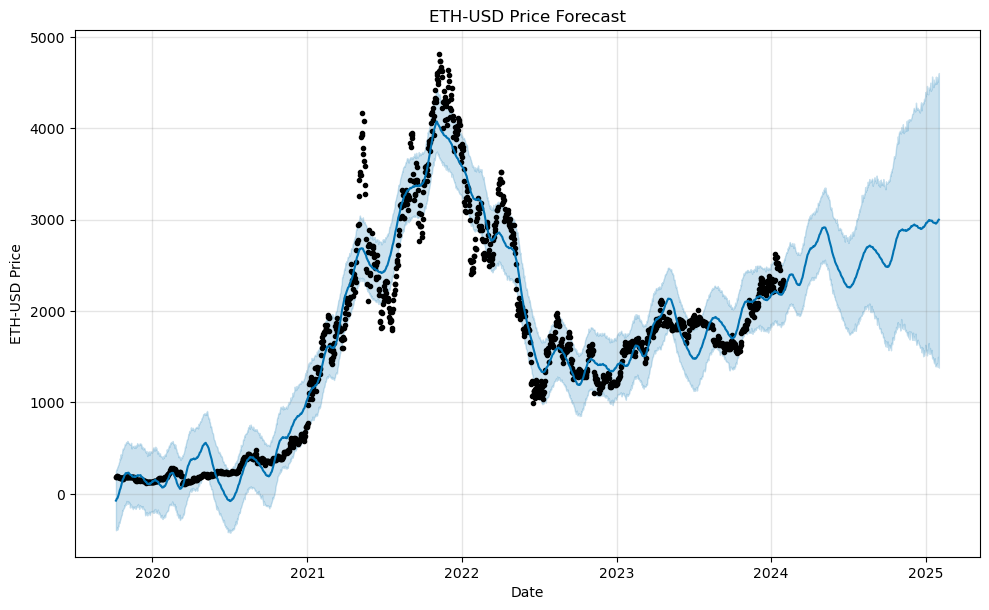

In [26]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')
plt.show()


23:50:51 - cmdstanpy - INFO - Chain [1] start processing
23:50:51 - cmdstanpy - INFO - Chain [1] done processing


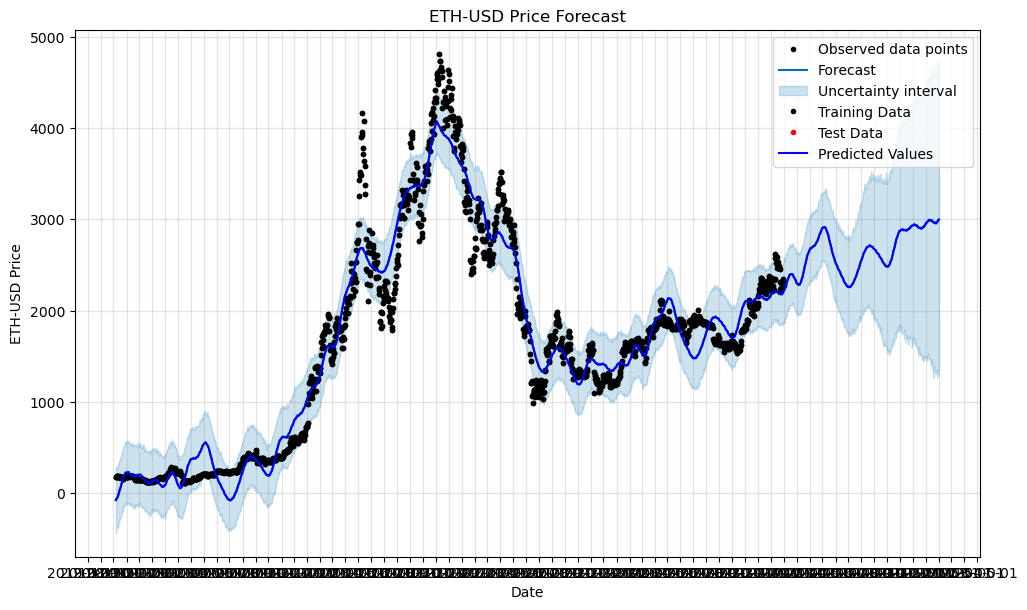

In [31]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Extracting training data
train_mask = (df['ds'] >= df['ds'].min()) & (df['ds'] <= df['ds'].max())
train_data = df.loc[train_mask]

# Extracting test data
test_mask = (df['ds'] > df['ds'].max())
test_data = df.loc[test_mask]

# Plot the forecast with more complete date system and additional information
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')

# Plotting training data
plt.plot(train_data['ds'], train_data['y'], 'k.', label='Training Data')

# Plotting test data
plt.plot(test_data['ds'], test_data['y'], 'r.', label='Test Data')

# Plotting actual vs. predicted values
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Adjust x-axis date formatting for more complete system
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show legend
plt.legend()

plt.show()


00:04:25 - cmdstanpy - INFO - Chain [1] start processing
00:04:25 - cmdstanpy - INFO - Chain [1] done processing


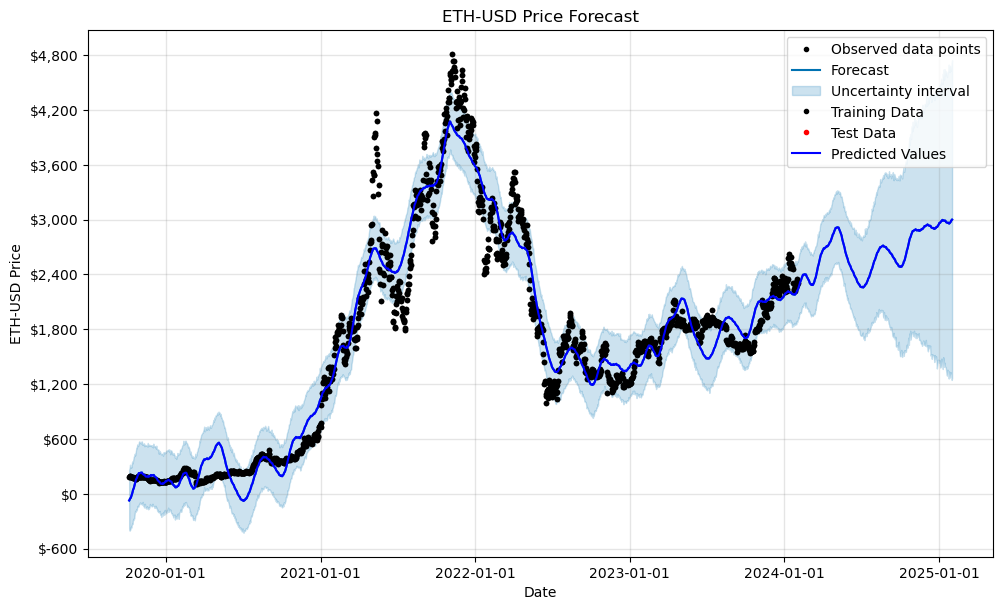

In [40]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Extracting training data
train_mask = (df['ds'] >= df['ds'].min()) & (df['ds'] <= df['ds'].max())
train_data = df.loc[train_mask]

# Extracting test data
test_mask = (df['ds'] > df['ds'].max())
test_data = df.loc[test_mask]

# Plot the forecast with adjusted date and y-axis settings
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')

# Plotting training data
plt.plot(train_data['ds'], train_data['y'], 'k.', label='Training Data')

# Plotting test data
plt.plot(test_data['ds'], test_data['y'], 'r.', label='Test Data')

# Plotting actual vs. predicted values
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Adjust x-axis date formatting for more complete system
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust y-axis settings for better precision
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Show legend
plt.legend()

plt.show()


00:01:46 - cmdstanpy - INFO - Chain [1] start processing
00:01:47 - cmdstanpy - INFO - Chain [1] done processing


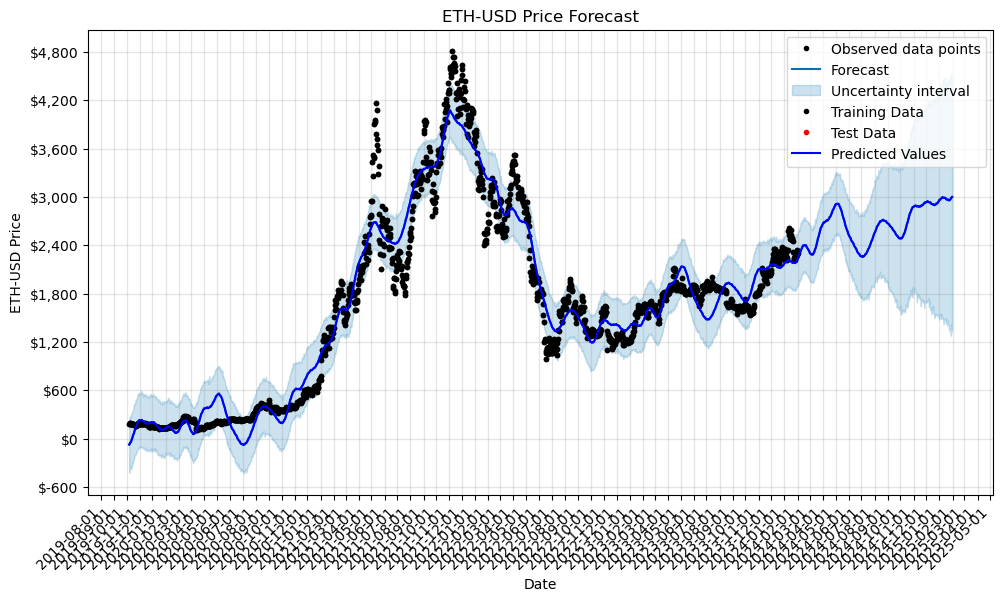

In [37]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Extracting training data
train_mask = (df['ds'] >= df['ds'].min()) & (df['ds'] <= df['ds'].max())
train_data = df.loc[train_mask]

# Extracting test data
test_mask = (df['ds'] > df['ds'].max())
test_data = df.loc[test_mask]

# Plot the forecast with adjusted date and y-axis settings
fig = model.plot(forecast)
plt.title('ETH-USD Price Forecast')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')

# Plotting training data
plt.plot(train_data['ds'], train_data['y'], 'k.', label='Training Data')

# Plotting test data
plt.plot(test_data['ds'], test_data['y'], 'r.', label='Test Data')

# Plotting actual vs. predicted values
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Adjust x-axis date formatting for more complete system
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust rotation of x-axis labels for better visibility
plt.gcf().autofmt_xdate(rotation=45)

# Adjust y-axis settings for better precision
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Show legend
plt.legend()

plt.show()


00:12:47 - cmdstanpy - INFO - Chain [1] start processing
00:12:47 - cmdstanpy - INFO - Chain [1] done processing


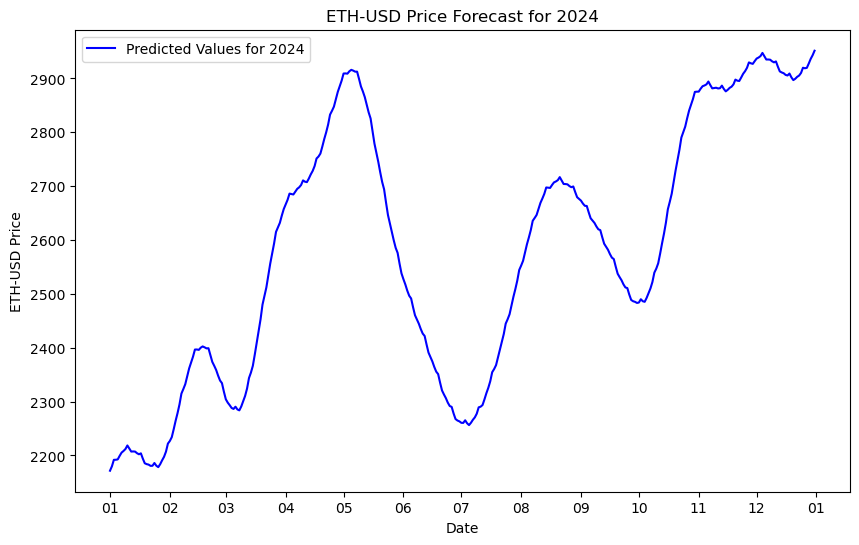

In [48]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot only the predictions for 2024
fig = plt.figure(figsize=(10, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], color='blue', label='Predicted Values for 2024')
plt.title('ETH-USD Price Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('ETH-USD Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.legend()
plt.show()


In [50]:
# Extract the actual values for 2024 from the original dataset
actual_2024 = df[df['ds'].dt.year == 2024]['y']

# Ensure that actual_2024 and predicted_2024 have the same length
min_length = min(len(actual_2024), len(predicted_2024))
actual_2024 = actual_2024.head(min_length)
predicted_2024 = predicted_2024.head(min_length)

# Continue with the calculation of evaluation metrics
mae_2024 = mean_absolute_error(actual_2024, predicted_2024)
mse_2024 = mean_squared_error(actual_2024, predicted_2024)
rmse_2024 = np.sqrt(mse_2024)
mape_2024 = mean_absolute_percentage_error(actual_2024, predicted_2024)

print(f'Mean Absolute Error (MAE) for 2024: {mae_2024}')
print(f'Mean Squared Error (MSE) for 2024: {mse_2024}')
print(f'Root Mean Squared Error (RMSE) for 2024: {rmse_2024}')
print(f'Mean Absolute Percentage Error (MAPE) for 2024: {mape_2024}%')



Mean Absolute Error (MAE) for 2024: 175.834185401505
Mean Squared Error (MSE) for 2024: 46008.53419783125
Root Mean Squared Error (RMSE) for 2024: 214.49600042385697
Mean Absolute Percentage Error (MAPE) for 2024: 7.161962551726619%


21:42:17 - cmdstanpy - INFO - Chain [1] start processing
21:42:18 - cmdstanpy - INFO - Chain [1] done processing


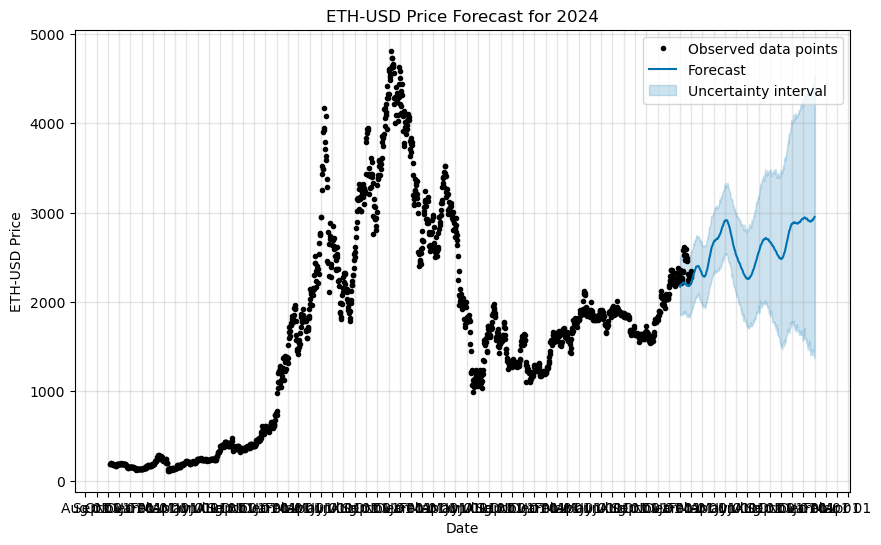

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot the forecast for 2024
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast_2024, ax=ax)
ax.set_title('ETH-USD Price Forecast for 2024')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.legend()
plt.show()


21:45:12 - cmdstanpy - INFO - Chain [1] start processing
21:45:12 - cmdstanpy - INFO - Chain [1] done processing


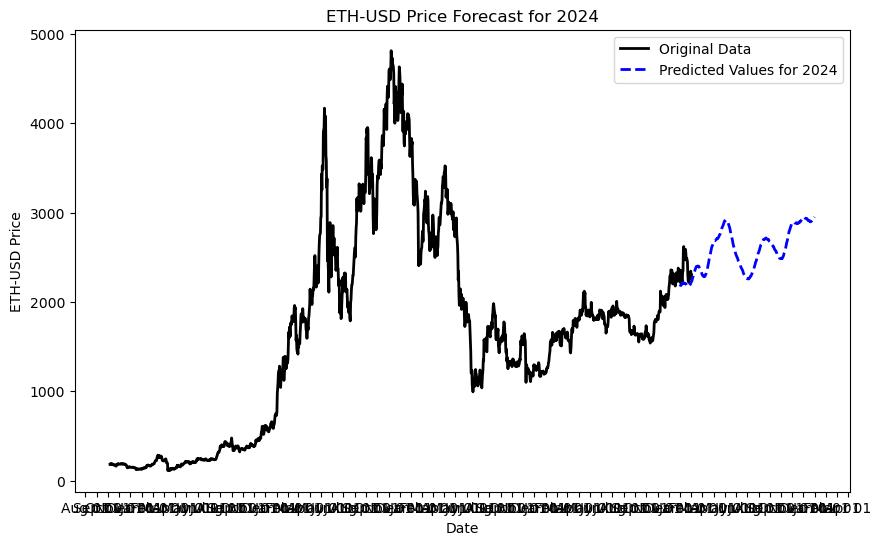

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot the original data and forecast for 2024
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data
ax.plot(df['ds'], df['y'], label='Original Data', color='black', linestyle='-', linewidth=2)

# Plot predicted values for 2024
ax.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Predicted Values for 2024', color='blue', linestyle='--', linewidth=2)

ax.set_title('ETH-USD Price Forecast for 2024')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.legend()
plt.show()


21:58:00 - cmdstanpy - INFO - Chain [1] start processing
21:58:01 - cmdstanpy - INFO - Chain [1] done processing


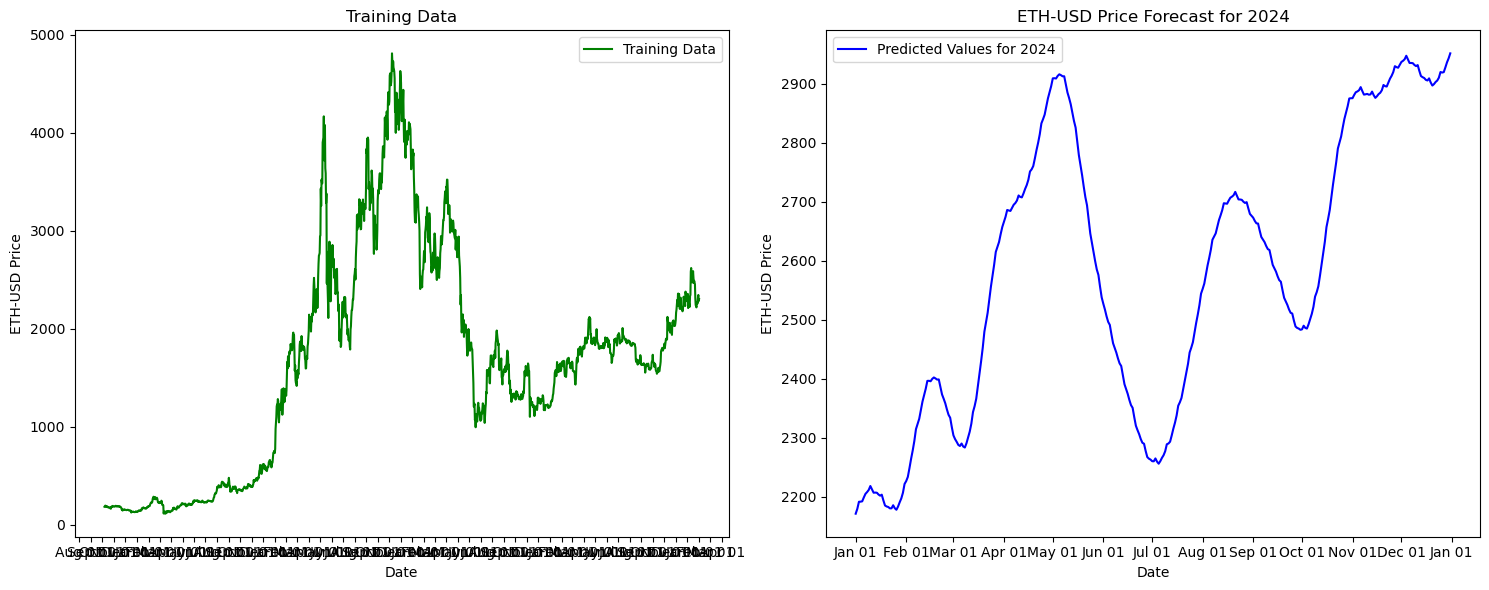

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Filter the forecast for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Plot the training data and predictions side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot training data
axes[0].plot(df['ds'], df['y'], color='green', label='Training Data')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('ETH-USD Price')
axes[0].xaxis.set_major_locator(MonthLocator())
axes[0].xaxis.set_major_formatter(DateFormatter('%b %d'))
axes[0].legend()

# Plot predictions for 2024
axes[1].plot(forecast_2024['ds'], forecast_2024['yhat'], color='blue', label='Predicted Values for 2024')
axes[1].set_title('ETH-USD Price Forecast for 2024')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('ETH-USD Price')
axes[1].xaxis.set_major_locator(MonthLocator())
axes[1].xaxis.set_major_formatter(DateFormatter('%b %d'))
axes[1].legend()

plt.tight_layout()
plt.show()


22:07:37 - cmdstanpy - INFO - Chain [1] start processing
22:07:38 - cmdstanpy - INFO - Chain [1] done processing


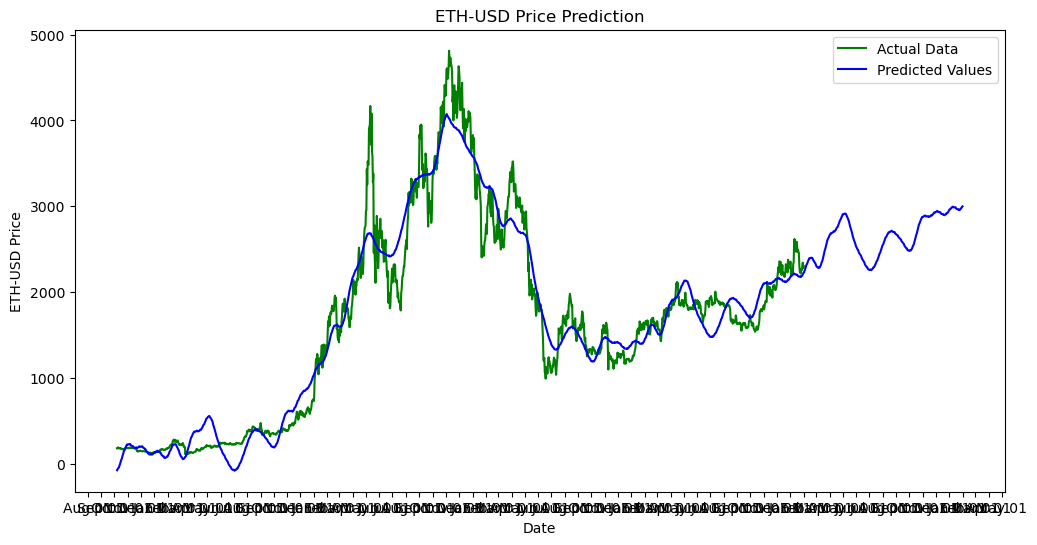

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the entire dataset with predictions
fig, ax = plt.subplots(figsize=(12, 6))

# Plot training data
ax.plot(df['ds'], df['y'], color='green', label='Actual Data')

# Plot predictions
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

ax.set_title('ETH-USD Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


23:46:10 - cmdstanpy - INFO - Chain [1] start processing
23:46:11 - cmdstanpy - INFO - Chain [1] done processing


Actual Value on 2024-01-01 00:00:00: 2352.33
Predicted Value on 2024-01-01 00:00:00: 2171.65
Error: 180.68


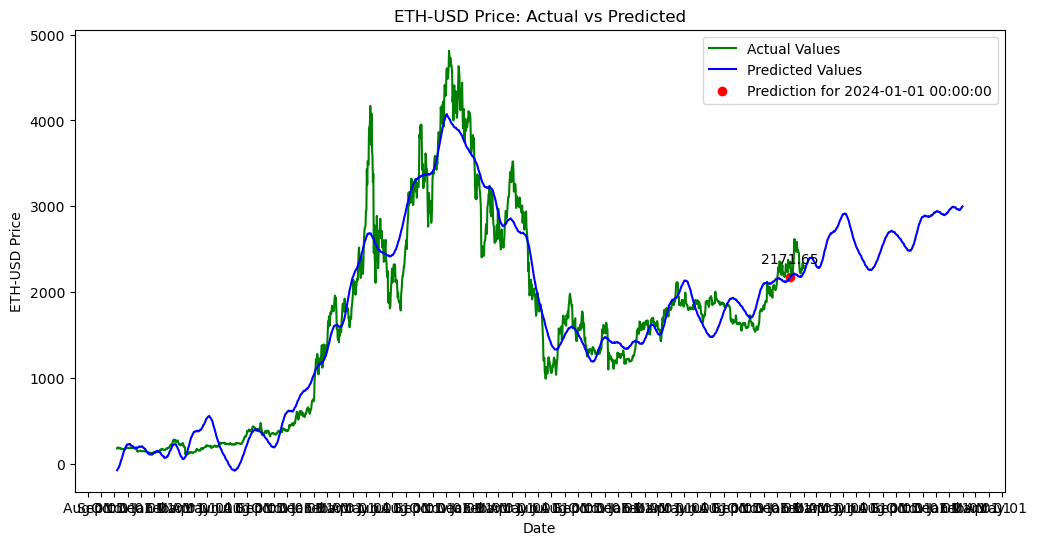

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Choose a specific date for prediction (replace with your desired date)
specific_date = pd.to_datetime("2024-01-01")

# Filter the forecast for the specific date
forecast_specific_date = forecast[forecast['ds'] == specific_date]

# Extract the predicted and actual values
predicted_value = forecast_specific_date['yhat'].values[0]
actual_value = df[df['ds'] == specific_date]['y'].values[0]

# Calculate the absolute error
error = abs(predicted_value - actual_value)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Highlight the specific date and predicted value
ax.scatter(specific_date, predicted_value, color='red', label='Prediction for {}'.format(specific_date))
ax.annotate(f'{predicted_value:.2f}', (specific_date, predicted_value), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

# Print the actual and predicted values, as well as the error
print(f"Actual Value on {specific_date}: {actual_value:.2f}")
print(f"Predicted Value on {specific_date}: {predicted_value:.2f}")
print(f"Error: {error:.2f}")

plt.show()


22:55:48 - cmdstanpy - INFO - Chain [1] start processing
22:55:49 - cmdstanpy - INFO - Chain [1] done processing


Predicted Value on 2024-03-03 00:00:00: 2293.36


NameError: name 'actual_value' is not defined

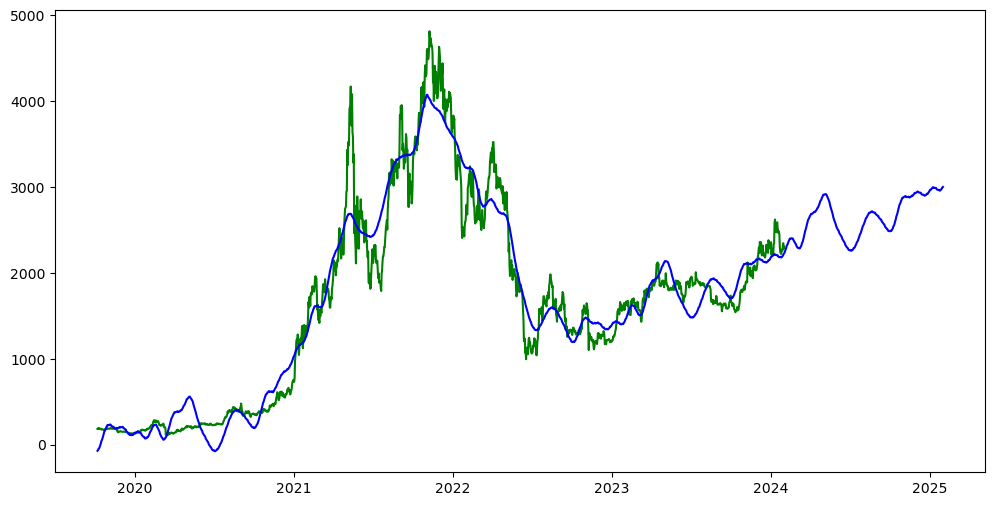

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Choose a specific date for prediction (replace with your desired date in the future)
specific_date = pd.to_datetime("2024-03-03")

# Filter the forecast for the specific date
forecast_specific_date = forecast[forecast['ds'] == specific_date]

# Extract the predicted value
predicted_value = forecast_specific_date['yhat'].values[0]

# Print the predicted value and date
print(f"Predicted Value on {specific_date}: {predicted_value:.2f}")

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

error = abs(predicted_value - actual_value)
print(f"Error: {error:.2f}")
# Highlight the specific date and predicted value
ax.scatter(specific_date, predicted_value, color='red', label='Prediction for {}'.format(specific_date))
ax.annotate(f'{predicted_value:.2f}', (specific_date, predicted_value), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


20:56:32 - cmdstanpy - INFO - Chain [1] start processing
20:56:32 - cmdstanpy - INFO - Chain [1] done processing


Predicted Value on 2024-01-03 00:00:00: 2191.87


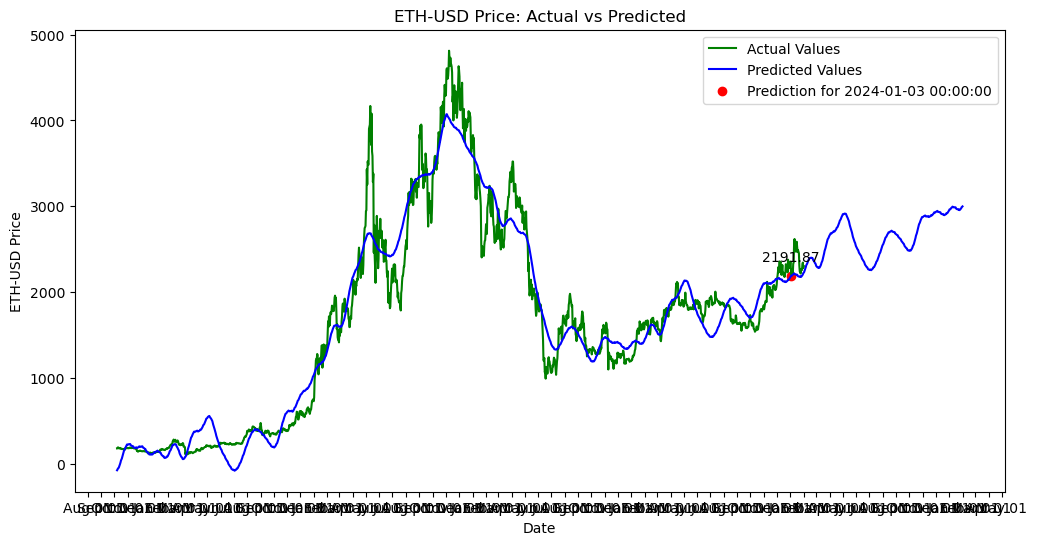

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Choose a specific date for prediction (replace with your desired date)
specific_date = pd.to_datetime("2024-01-03")

# Filter the forecast for the specific date
forecast_specific_date = forecast[forecast['ds'] == specific_date]

# Extract the predicted and actual values
predicted_value = forecast_specific_date['yhat'].values[0]
actual_value = df[df['ds'] == specific_date]['y'].values[0]

# Calculate the absolute error
error = abs(predicted_value - actual_value)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Highlight the specific date and predicted value
ax.scatter(specific_date, predicted_value, color='red', label='Prediction for {}'.format(specific_date))
ax.annotate(f'{predicted_value:.2f}', (specific_date, predicted_value), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

# Print the actual and predicted values, as well as the error
# print(f"Actual Value on {specific_date}: {actual_value:.2f}")
print(f"Predicted Value on {specific_date}: {predicted_value:.2f}")
# print(f"Error: {error:.2f}")

plt.show()

23:24:30 - cmdstanpy - INFO - Chain [1] start processing
23:24:31 - cmdstanpy - INFO - Chain [1] done processing


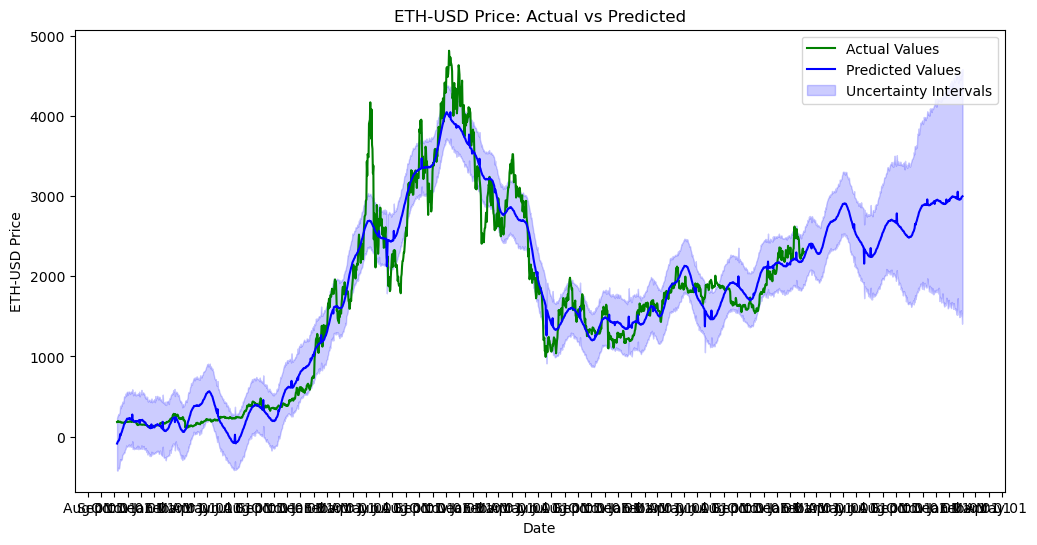

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the strength of the trend flexibility
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    holidays_prior_scale=10,  # Adjust the impact of holidays
    seasonality_prior_scale=10  # Adjust the strength of seasonality
)
model.add_country_holidays(country_name='US')  # Add US holidays (adjust based on your country)

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


22:50:17 - cmdstanpy - INFO - Chain [1] start processing
22:50:17 - cmdstanpy - INFO - Chain [1] done processing


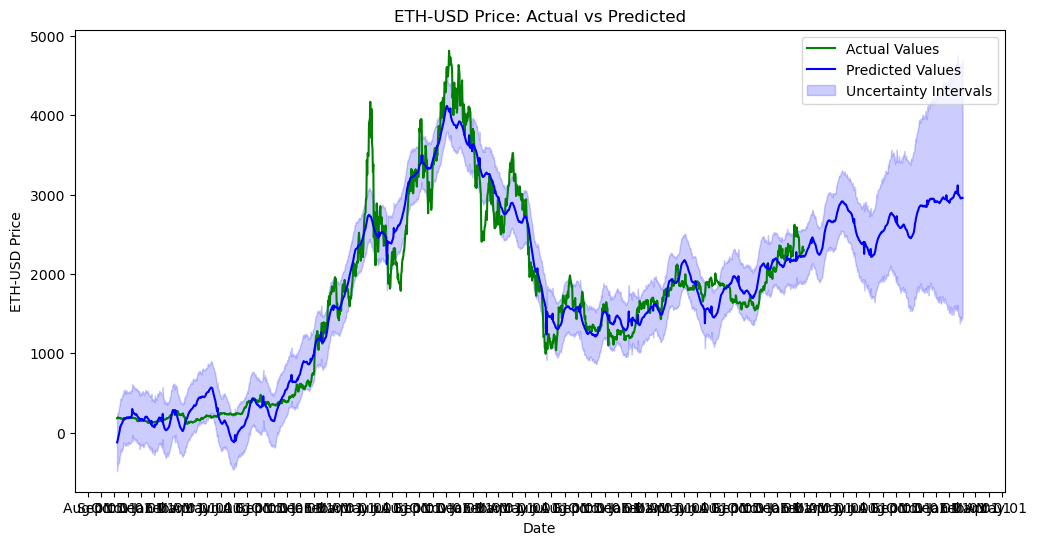

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.05,  # Adjust the strength of the trend flexibility
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=20,  # Adjust the impact of holidays
    seasonality_prior_scale=15  # Adjust the strength of seasonality
)

# Add holidays
model.add_country_holidays(country_name='US')
model.add_seasonality(name='crypto_seasonality', period=30, fourier_order=5)  # Add extra seasonality (adjust period and order)

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()


23:02:20 - cmdstanpy - INFO - Chain [1] start processing
23:02:21 - cmdstanpy - INFO - Chain [1] done processing


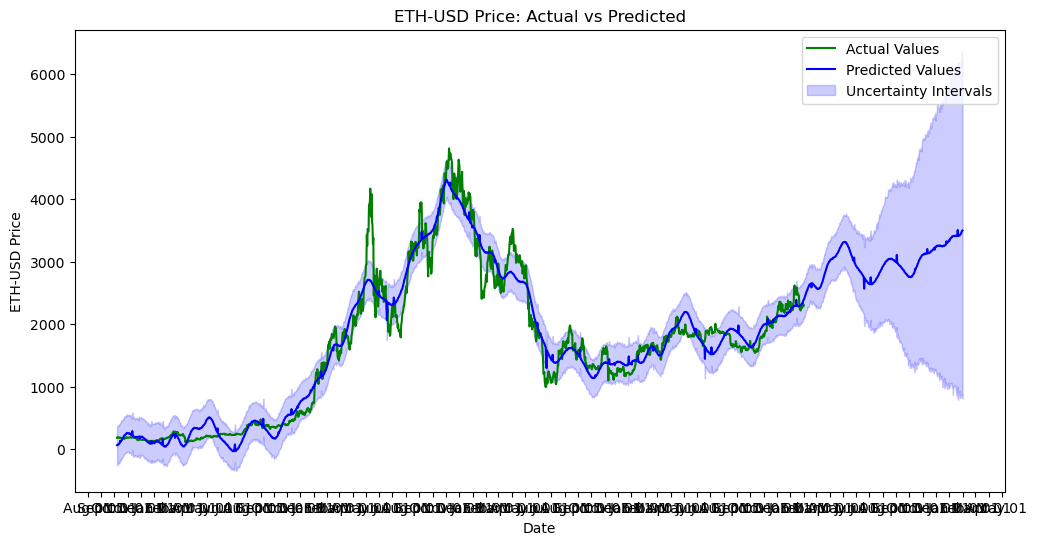

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Load the dataset
file_path = "ETH-USD.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to match Prophet's requirements
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model with adjusted parameters
model = Prophet(
    growth='linear',  # Try 'logistic' for logistic growth
    changepoint_prior_scale=0.1,  # Adjust the flexibility of trend adjustment
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # Disable daily seasonality
    holidays_prior_scale=20,  # Adjust the impact of holidays
    seasonality_prior_scale=15,  # Adjust the strength of seasonality
    seasonality_mode='additive'  # Additive seasonality (default)
)

# Add holidays
model.add_country_holidays(country_name='US')

model.fit(df)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecast for one year into the future

# Make predictions
forecast = model.predict(future)

# Plot the actual values and predictions on the same axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual values
ax.plot(df['ds'], df['y'], color='green', label='Actual Values')

# Plot predicted values
ax.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted Values')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Intervals')

ax.set_title('ETH-USD Price: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('ETH-USD Price')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
ax.legend()

plt.show()
